In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xls = pd.ExcelFile('../../data/WorldEnergyBalancesHighlights_final.xlsx')
df = pd.read_excel(xls, 'TimeSeries_1971-2019',header=1,index_col=[0,1,2],usecols="A:C,Z:BB",na_values=['..','c'])

In [3]:
br = df.loc[('Brazil')]
world = df.loc[('World')]

In [4]:
years = df.transpose().index.tolist()
def commanPlot(obj,list_year=years):
    obj.plot(figsize=(15,10))
    plt.xticks(list_year)
    plt.xticks(rotation=90)
    plt.show()

### Total de consumo por ano

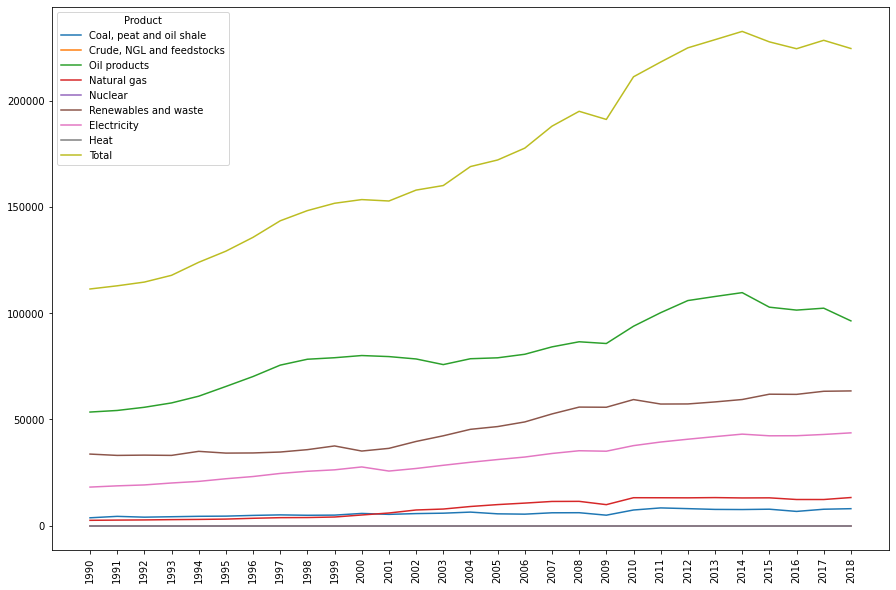

In [10]:
obj = br.xs('Total final consumption (ktoe)',level='Flow').transpose()
commanPlot(obj)

### Total de consumo de derivados do petróleo por ano

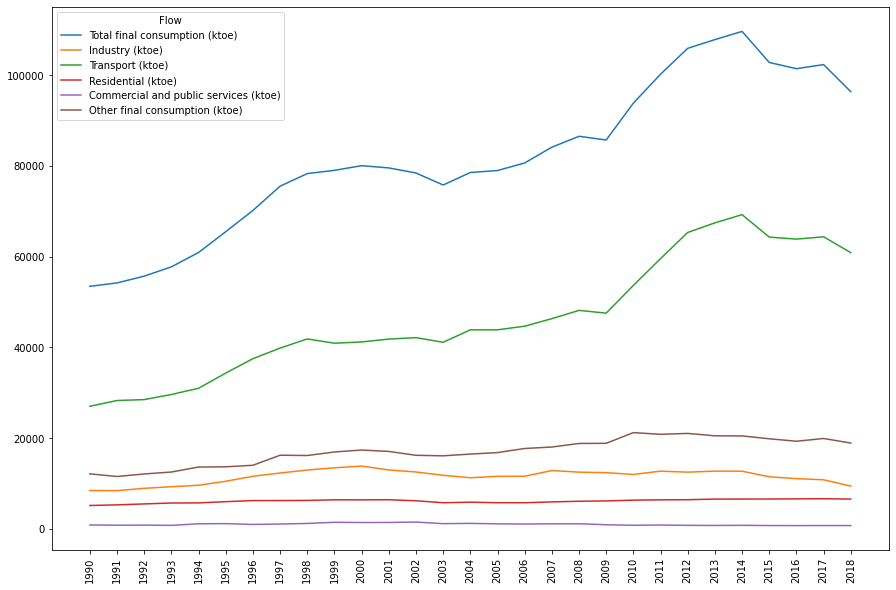

In [6]:
obj =br.xs('Oil products').iloc[6:12].transpose()
commanPlot(obj)

### Porcentagem do consumo das fontes na área do transporte acumulado e no ano de 2018

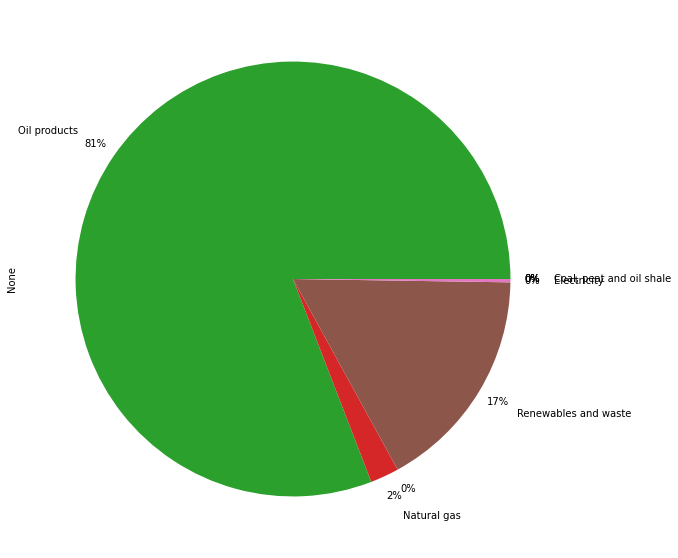

<AxesSubplot:ylabel='2018'>

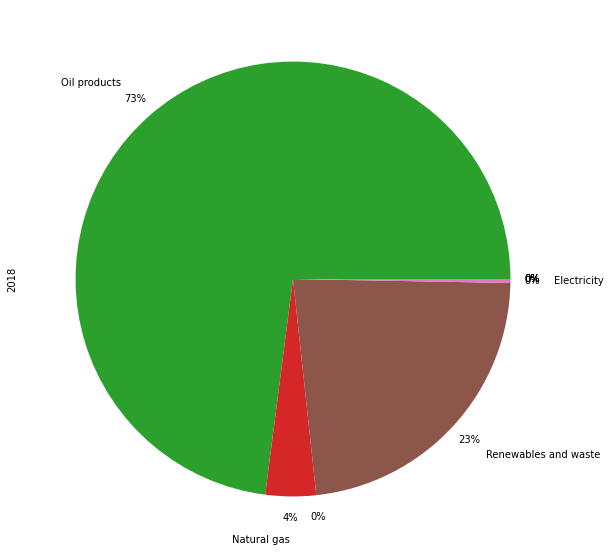

In [7]:
obj:pd.DataFrame = br.xs('Transport (ktoe)',level='Flow').transpose()
obj = obj.drop('Total',axis=1)
obj.sum().plot(kind='pie',autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, figsize=(15,10))
plt.show()
obj.loc[(2018)].plot(kind='pie',autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, figsize=(15,10))

### Consumo do petróleo na área do transporte ao longo dos anos

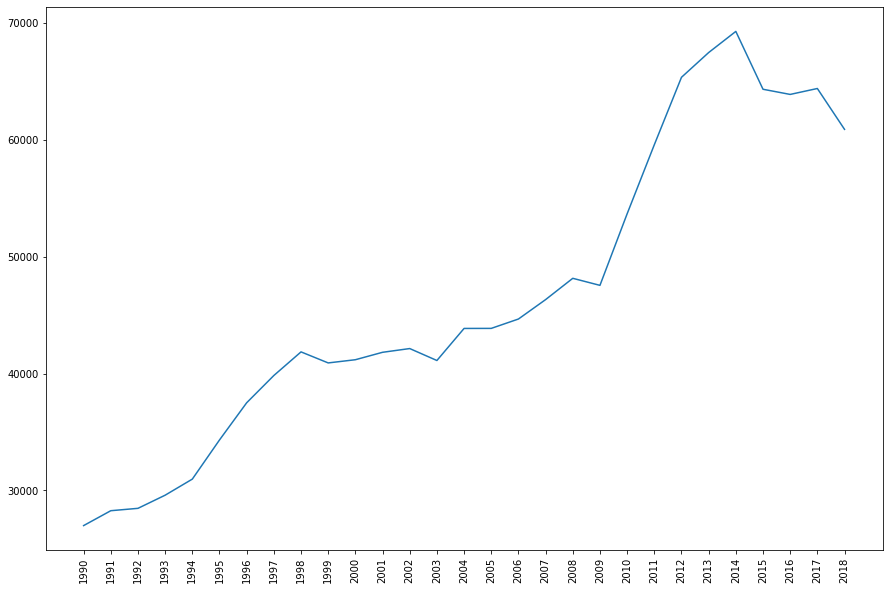

In [8]:
obj:pd.DataFrame = br.xs('Transport (ktoe)',level='Flow').transpose()
commanPlot(obj['Oil products'])

### Porcentagem de consumo de petróleo na área de transporte em relação ao total de consumo de petróleo

/home/vitor/Documents/Facu/PER/CDD/Trabalhos/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


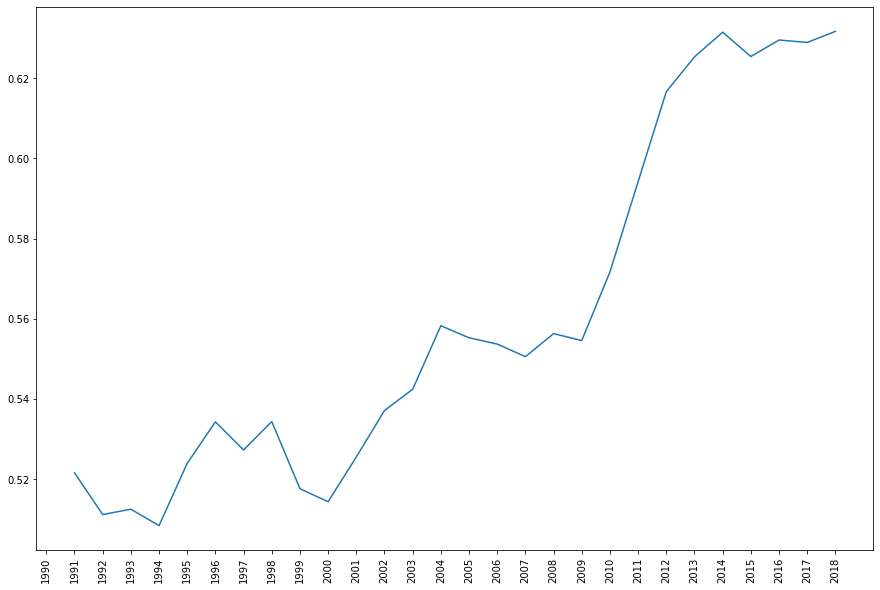

1991    0.521585
1992    0.511174
1993    0.512502
1994    0.508414
1995    0.523953
1996    0.534293
1997    0.527276
1998    0.534361
1999    0.517605
2000    0.514370
2001    0.525529
2002    0.537116
2003    0.542412
2004    0.558268
2005    0.555260
2006    0.553697
2007    0.550544
2008    0.556301
2009    0.554561
2010    0.571689
2011    0.594225
2012    0.616666
2013    0.625332
2014    0.631487
2015    0.625420
2016    0.629532
2017    0.628938
2018    0.631684
dtype: float64

In [9]:
obj = br.xs('Oil products').transpose()
#Porcentagem de consumo dos derivados do petroleo no transporte em 2018
perc_oil = pd.Series(index=range(1991,2019))
for i in range(1991,2019):
    perc_oil[i] = br.xs('Transport (ktoe)',level='Flow').transpose().loc[(i)]['Oil products']/obj['Total final consumption (ktoe)'].loc[(i)]
commanPlot(perc_oil)
perc_oil